# <font color=red> Assignment </font>

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

The dataset is a time series of COVID-19 confirmed cases globally, with each row representing a different country or region, and columns for latitude, longitude, and daily confirmed cases starting from January 22, 2020.

Original Data:
    Province/State        Country/Region        Lat        Long  1/22/20  \
0              NaN           Afghanistan  33.939110   67.709953        0   
1              NaN               Albania  41.153300   20.168300        0   
2              NaN               Algeria  28.033900    1.659600        0   
3              NaN               Andorra  42.506300    1.521800        0   
4              NaN                Angola -11.202700   17.873900        0   
..             ...                   ...        ...         ...      ...   
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  

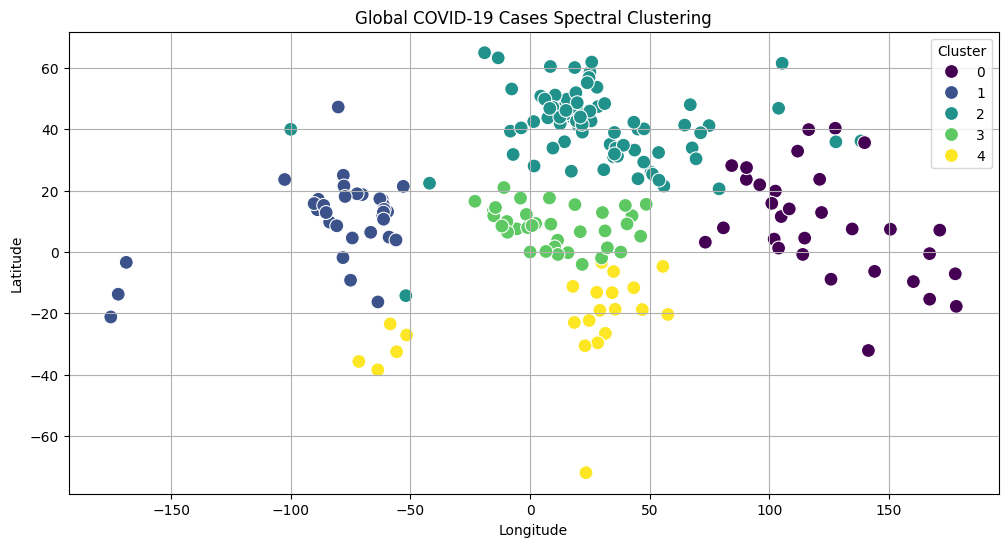

In [8]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './time_series_covid19_confirmed_global.csv'
covid_data = pd.read_csv(file_path)
print("Original Data:")
print(covid_data)

# Preprocessing
most_recent_date = covid_data.columns[-1]
data_for_clustering = covid_data[['Country/Region', 'Lat', 'Long', most_recent_date]].copy()
data_for_clustering.rename(columns={most_recent_date: 'ConfirmedCases'}, inplace=True)
grouped_data = data_for_clustering.groupby('Country/Region').agg({'Lat': 'mean', 'Long': 'mean', 'ConfirmedCases': 'sum'}).reset_index()

print('Preprocessed data')
print(grouped_data)

# Normalizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data[['Lat', 'Long', 'ConfirmedCases']])

# Spectral Clustering
n_clusters = 5
spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
cluster_labels = spectral_cluster.fit_predict(scaled_data)
grouped_data['Cluster'] = cluster_labels

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Long', y='Lat', hue='Cluster', palette='viridis', data=grouped_data, s=100)
plt.title('Global COVID-19 Cases Spectral Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


Analyzing the spectral clustering results on the COVID-19 dataset reveals a clear geographical pattern in the data, with countries in close proximity often falling into the same cluster, suggesting that geographical factors played a significant role in the spread of the virus. Additionally, the number of confirmed cases per country influences clustering, indicating varying pandemic impacts across clusters. It's important to note, however, that this analysis is based solely on the most recent case counts and geographical locations, omitting other critical factors like healthcare infrastructure, testing rates, and public health policies. While these results provide a high-level overview of pandemic spread and impact, they should be seen as a preliminary exploration, warranting further in-depth analysis that includes more diverse data for a comprehensive understanding.

# <font color=red> Eigenvector Centrality Assignment 1 </font>

Given the following graph below, find it eigenvector centrality:

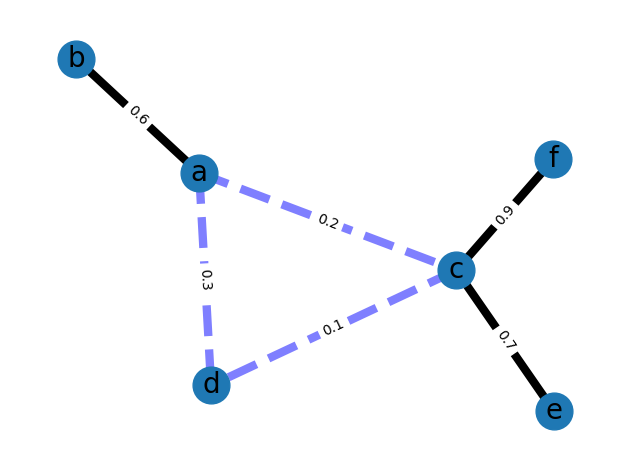

{'a': 0.19748104211845485,
 'b': 0.10067079156354394,
 'c': 0.6959564646836505,
 'd': 0.1094655342513362,
 'e': 0.4139109692869515,
 'f': 0.5321712462260804}

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Creating the graph as per the provided structure
G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

# Defining large and small edges based on weight
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

# Positioning for all nodes with a seed for reproducibility
pos = nx.spring_layout(G, seed=7)

# Drawing nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Drawing edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# Node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# Edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

# Setting plot margins and turning off the axis
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()

# Displaying the graph
plt.show()

# Now, calculating the eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(G, weight='weight')
eigenvector_centrality


# <font color=red> Assignment 2 </font>

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

Subreddit: Eldenring
Title: Elden Ring
Centrality Nodes based on corresponding Eigenvectors: [Redditor(name='Pablonskyy24'), Redditor(name='Outside_Conclusion13'), Redditor(name='Crazy9000'), Redditor(name='NoodleBack'), Redditor(name='johnyrocketboy')]
Graph with 395 nodes and 400 edges


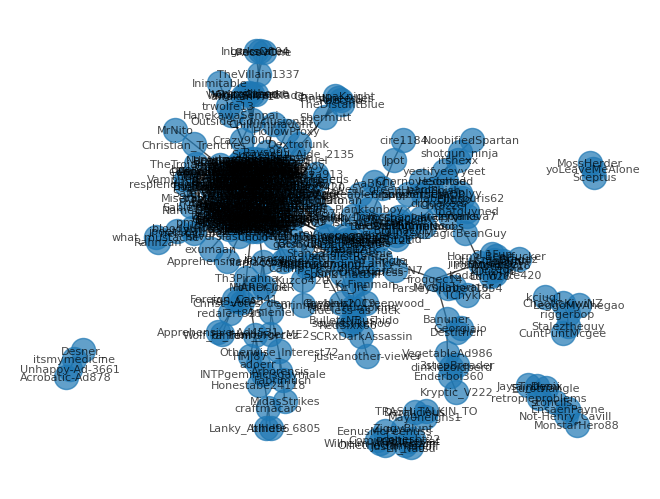

In [12]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

# Create a Reddit instance
reddit = praw.Reddit(
    client_id = "18yBykvuIkukVFXgG6ii1Q",
    client_secret = "-FZFVHqg3Av1zogKKV3LWyft-nHeaA",
    user_agent = "discrete_with_it",
)

def print_subreddit_info(subreddit):
    print(f"Subreddit: {subreddit.display_name}")
    print(f"Title: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Skip MoreComments objects
        if isinstance(comment, praw.models.MoreComments):
            continue

        # Check if the comment and parent comment have valid authors
        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)  # Set layout algorithm
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

# Choose a subreddit
subreddit_name = "Eldenring"
subreddit = reddit.subreddit(subreddit_name)

# Print subreddit information
print_subreddit_info(subreddit)

# Get the top post from the subreddit
post_id = get_top_post_id(subreddit)

# Create social network graph from comments
social_network = create_social_network(post_id)

# Perform social network analysis
perform_social_network_analysis(social_network)

# Visualize the network
visualize_network(social_network)



# Hypothesis

In the "Elden Ring" subreddit, certain users (nodes) are central to the community's discussions, playing a significant role in information dissemination and community engagement. These central users can be identified using eigenvector centrality measures in a social network formed from comment interactions on a top post.

# Conlcusion
The nodes central in terms of eigenvector centrality are identified as Redditor names 'Pablonskyy24', 'Outside_Conclusion13', 'Crazy9000', 'NoodleBack', and 'johnyrocketboy'. Eigenvector centrality measures a node's influence based on the principle that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. Therefore, these identified Redditors are not just active but are likely influential within the network, contributing significantly to the flow of information and engagement within the community discussions.
